In [1]:
def prune(input_list):
    l = []

    for e in input_list:
        e = e.strip() # remove the leading and trailing characters, here space
        if e != '' and e != ' ':
            l.append(e)

    return l

In [2]:
def result_plot(file=None):
    acc_list = []
    csv_file = open(file, 'r')
    first = True
    for row in csv_file:
        if first is True:
            first = False
            continue
            
        elems = row.strip().split(',')
        elems = prune(elems)
        acc_list.append(float(elems[1]))
    
    return acc_list

In [3]:
convnet_mnist_acc = result_plot(file="../convnet_mnist/convnet_mnist_result.csv")
print(convnet_mnist_acc)

[98.94, 98.98, 99.03, 99.07, 99.06, 99.07, 99.04, 99.04, 99.17]


In [4]:
resnet18_cifar10_acc = result_plot(file="../resnet18_cifar10/resnet18_cifar10_result.csv")
print(resnet18_cifar10_acc)

[19.5, 77.44, 92.31, 94.39, 94.6, 94.7, 94.77, 94.75, 95.38]


In [5]:
alexnet_imagenet_acc = result_plot(file="../alexnet_imagenet/alexnet_imagenet_result.csv")
print(alexnet_imagenet_acc)

[0.13, 0.24, 2.474, 21.672, 42.438, 50.402, 53.452, 54.286, 56.55]


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

font = {'family':'Times New Roman', 'size': 6}

matplotlib.rc('font', **font)

In [7]:
labels = ['32', '64', '128', '256', '512', '1024', '2048', '4096', 'FP32']

In [8]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [9]:
my_dpi = 300
fig_h = 1.1
fig_w = 3.3115

95 100


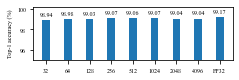

In [10]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
data = convnet_mnist_acc

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
rects1 = ax.bar(x, data, width)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min(data) / 5) * 5)
top = int(math.ceil( max(data) / 5) * 5)
print(bot, top)
ax.set_ylim(bot, top+0.2)
ax.set_yticks([96, 98, 100])
ax.set_yticklabels([96, 98, 100])

autolabel(rects1)

fig.tight_layout()
plt.show()
fig.savefig("convnet_mnist_acc.pdf", bbox_inches='tight', dpi=my_dpi)

15 100


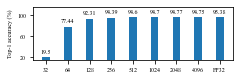

In [11]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
data = resnet18_cifar10_acc

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
rects1 = ax.bar(x, data, width)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min(data) / 5) * 5)
top = int(math.ceil( max(data) / 5) * 5)
print(bot, top)
ax.set_ylim(bot, top+15)
ax.set_yticks([20, 60, 100])
ax.set_yticklabels([20, 60, 100])

autolabel(rects1)

fig.tight_layout()
plt.show()
fig.savefig("resnet18_cifar10_acc.pdf", bbox_inches='tight', dpi=my_dpi)

0 60


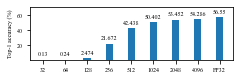

In [12]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
data = alexnet_imagenet_acc

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
rects1 = ax.bar(x, data, width)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min(data) / 5) * 5)
top = int(math.ceil( max(data) / 5) * 5)
print(bot, top)
ax.set_ylim(bot, top+11)
ax.set_yticks([20, 40, 60])
ax.set_yticklabels([20, 40, 60])
autolabel(rects1)

fig.tight_layout()
plt.show()
fig.savefig("alexnet_imagenet_acc.pdf", bbox_inches='tight', dpi=my_dpi)